 Importation librairies

In [1]:
# librairies
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, auc, precision_score, precision_recall_curve, classification_report, confusion_matrix, accuracy_score
from sklearn.mixture import GaussianMixture
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import scipy.io as sp

In [2]:
#traitement fichier.mat
dataset=sp.loadmat('breastw.mat')
X = dataset['X']
y = dataset['y']
#fin traitement mat

Modèles KNN / Statistique / Réseau de neurones + entrainement dataset

In [3]:
skf = StratifiedKFold(n_splits=10,shuffle=True) # équilibrage dataset

for train_index, test_index in skf.split(X,y):
    
    X_train, X_test = X[train_index,:], X[test_index,:]
    y_train, y_test = y[train_index], y[test_index]

    #Méthode Statistique Gaussienne
    model_gmm = GaussianMixture(n_components=2, covariance_type ='full', random_state = 0, max_iter=100)
    model_gmm.fit(X_train,y_train)
    y_pred_gmm = model_gmm.predict(X_test)
    y_scores_gmm = model_gmm.predict_proba(X_test)
    if precision_score(y_test,y_pred_gmm)< 0.15:
    
        y_pred_gmm = np.array([0 if label == 1 else 1 for label in y_pred_gmm])
        y_scores_gmm = 1-model_gmm.predict_proba(X_test)
        y_scores_gmm = y_scores_gmm[:, 1]
    else :
        y_scores_gmm = model_gmm.predict_proba(X_test)
        y_scores_gmm = y_scores_gmm[:, 1]
    #Fin méthode stat

    #Méthode KNN
    k=5
    #algo knn
    model_KNN = KNeighborsClassifier(n_neighbors=k)
    model_KNN.fit(X_train,y_train)
    y_pred_KNN = model_KNN.predict(X_test)
    model_PCA = PCA(n_components=2)
    data_reduced = model_PCA.fit_transform(X_test)
    #fin algo knn
    y_scores_KNN = model_KNN.predict_proba(X_test)
    y_scores_KNN = y_scores_KNN[:, 1]
    #Fin méthode KNN

    #Algorithme Réseau de neurones = Perceptron multicouches
    #Modèle1
    model_PMC_1 = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(8, 2), random_state=1)
    model_PMC_1.fit(X_train, y_train)
    y_pred_PMC_1= model_PMC_1.predict(X_test)
    #Modèle2
    model_PMC_2 = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(9, 2), random_state=1) #modif du nombre de couches cachées par ex ici 9
    model_PMC_2.fit(X_train, y_train)
    y_pred_PMC_2 = model_PMC_2.predict(X_test)
    #Fin alogo PMC
    y_scores_PMC_1 = model_PMC_1.predict(X_test)
    y_scores_PMC_2 = model_PMC_2.predict(X_test)
    #Fin méthode Réseaux de neurones

C:\Users\achan\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\achan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\achan\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\achan\anaconda3\lib\site-packages\sklearn\utils\validat

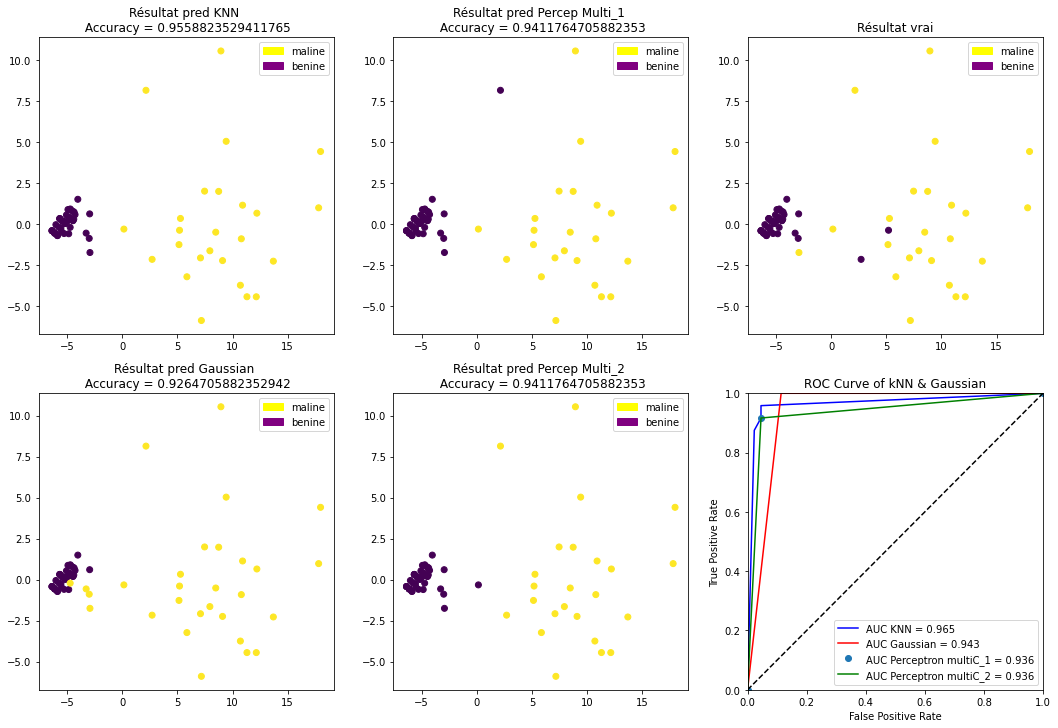

In [6]:
# Plot graphique

plt.figure(figsize=(18,12))

#Calculs Accuracy KNN
Accuracy_KNN = accuracy_score(y_test, y_pred_KNN)
Accuracy_gmm = accuracy_score(y_test, y_pred_gmm)
Accuracy_PMC_1 = accuracy_score(y_test, y_pred_PMC_1)
Accuracy_PMC_2 = accuracy_score(y_test, y_pred_PMC_2)

#Nuage de points prédictif KNN
plt.subplot(2, 3, 1)
plt.scatter(data_reduced[:,0],data_reduced[:,1],c=y_pred_KNN) 
plt.title("Résultat pred KNN \n Accuracy = {}".format(Accuracy_KNN))
maline = mpatches.Patch(color='yellow', label='maline')
benine = mpatches.Patch(color='purple', label='benine')
plt.legend(handles=[maline,benine])

#Nuage de points prédictif Gaussien
plt.subplot(2, 3, 4)
plt.scatter(data_reduced[:,0],data_reduced[:,1],c=y_pred_gmm) 
plt.title("Résultat pred Gaussian \n Accuracy = {}".format(Accuracy_gmm))
maline = mpatches.Patch(color='yellow', label='maline')
benine = mpatches.Patch(color='purple', label='benine')
plt.legend(handles=[maline,benine])

#Nuage de points prédictif Perceptron multicouche modèle 1
plt.subplot(2, 3, 2)
plt.scatter(data_reduced[:,0],data_reduced[:,1],c=y_pred_PMC_1) 
plt.title("Résultat pred Percep Multi_1 \n Accuracy = {}".format(Accuracy_PMC_1))
maline = mpatches.Patch(color='yellow', label='maline')
benine = mpatches.Patch(color='purple', label='benine')
plt.legend(handles=[maline,benine])

#Nuage de points prédictif Perceptron multicouche modèle 2
plt.subplot(2, 3, 5)
plt.scatter(data_reduced[:,0],data_reduced[:,1],c=y_pred_PMC_2) 
plt.title("Résultat pred Percep Multi_2 \n Accuracy = {}".format(Accuracy_PMC_2))
maline = mpatches.Patch(color='yellow', label='maline')
benine = mpatches.Patch(color='purple', label='benine')
plt.legend(handles=[maline,benine])

#Nuage de points vrai
plt.subplot(2, 3, 3)
plt.scatter(data_reduced[:,0],data_reduced[:,1],c=y_test) 
plt.title("Résultat vrai")
maline = mpatches.Patch(color='yellow', label='maline')
benine = mpatches.Patch(color='purple', label='benine')
plt.legend(handles=[maline,benine])

#  ROC curve
 #ROC pour KNN
fpr_KNN, tpr_KNN, threshold_KNN = roc_curve(y_test, y_scores_KNN) 
roc_auc_KNN = auc(fpr_KNN, tpr_KNN)
 #ROC pour Gaussien
fpr_gmm, tpr_gmm, thresholds_gmm = roc_curve(y_test,y_pred_gmm)
roc_auc_gmm = auc(fpr_gmm, tpr_gmm)
 #ROC pour Perceptron multicouche modèle 1
fpr_PMC_1, tpr_PMC_1, thresholds_PMC_1 = roc_curve(y_test,y_pred_PMC_1)
roc_auc_PMC_1 = auc(fpr_PMC_1, tpr_PMC_1)
 #ROC pour Perceptron multicouche modèle 2
fpr_PMC_2, tpr_PMC_2, thresholds_PMC_2 = roc_curve(y_test,y_pred_PMC_2)
roc_auc_PMC_2 = auc(fpr_PMC_2, tpr_PMC_2)

plt.subplot(2, 3, 6)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_KNN, tpr_KNN, 'b', label = 'AUC KNN = %0.3f' % roc_auc_KNN)
plt.plot(fpr_gmm, tpr_gmm, 'r', label = 'AUC Gaussian = %0.3f' % roc_auc_gmm)
plt.plot(fpr_PMC_1, tpr_PMC_1, 'o', label = 'AUC Perceptron multiC_1 = %0.3f' % roc_auc_PMC_1)
plt.plot(fpr_PMC_2, tpr_PMC_2, 'g', label = 'AUC Perceptron multiC_2 = %0.3f' % roc_auc_PMC_2)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'k--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN & Gaussian')
plt.show()
#fin graphique

In [5]:
# Matrice de  confusion, F1-score etc...

# Méthode KNN
result = confusion_matrix(y_test, y_pred_KNN)
print("Matrice de confusion KNN :")
print(result)
result1 = classification_report(y_test, y_pred_KNN)
print("Classification Report KNN :",)
print (result1)
print("Accuracy KNN :", Accuracy_KNN, "\n")

# Méthode Statistique Gaussien
result = confusion_matrix(y_test, y_pred_gmm)
print("Matrice de confusion Gaussien :")
print(result)
result1 = classification_report(y_test, y_pred_gmm)
print("Classification Report Gaussian :",)
print (result1)
print("Accuracy Gaussian :", Accuracy_gmm)

Matrice de confusion KNN :
[[42  2]
 [ 1 23]]
Classification Report KNN :
              precision    recall  f1-score   support

           0       0.98      0.95      0.97        44
           1       0.92      0.96      0.94        24

    accuracy                           0.96        68
   macro avg       0.95      0.96      0.95        68
weighted avg       0.96      0.96      0.96        68

Accuracy KNN : 0.9558823529411765 

Matrice de confusion Gaussien :
[[39  5]
 [ 0 24]]
Classification Report Gaussian :
              precision    recall  f1-score   support

           0       1.00      0.89      0.94        44
           1       0.83      1.00      0.91        24

    accuracy                           0.93        68
   macro avg       0.91      0.94      0.92        68
weighted avg       0.94      0.93      0.93        68

Accuracy Gaussian : 0.9264705882352942
